In [2]:
#!pip3 install pandas
#!pip3 install matplotlib
#!pip3 install numpy
#!pip3 install seaborn
#!pip3 install opencv-python

In [1]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np
import itertools
import cv2
import os
from typing import List,Tuple

In [2]:
train_csv_path = './train.csv'
train_data_path = './train_images'
test_csv_path = './test.csv'
test_data_path = './test_images'
unicode_csv = './unicode_translation.csv'

train_df = pd.read_csv(train_csv_path)

In [3]:
train_df.loc

Okay, so we have image_id followed by the labels. Labels are the character, in unicode, followed by the x,y, width, and height, of the bounding box.

In [4]:
unicode_translation_df = pd.read_csv(unicode_csv)
unicode_translation_df

,Unicode,char
0,U+0031,1
1,U+0032,2
2,U+0034,4
3,U+0036,6
4,U+0039,9
...,...,...
4776,U+FA5C,臭
4777,U+FA65,贈
4778,U+FA68,難
4779,U+FF0D,－


Are there really 4781 Kuzushiji characters? Well, that won't matter yet, just good to note. 

Now lets just examine any image and draw the bounding boxes for the characters mentioned

In [5]:
def draw_bboxes(image_path: str, bbox_data: List[List[float]]):
    """
    Given an image path and a set of bounding box coordinates, draw boxes
    and display image
    
     
    """
    im = cv2.imread(image_path)
    for [x1,y1,x2,y2] in bbox_data:
        im = cv2.rectangle(im, (x1,y1), (x2,y2), (0,255,0), 1)
    #plt.figure(figsize = (50,20))
    plt.imshow(im, aspect=1)
    plt

def create_bboxes(labels: str):
    dims =  [s for (i,s) in enumerate(labels.split(' ')) if i%5 != 0]
    return [[x1,y1,x1+w,y1+h] for [x1,y1,w,h] in np.asarray(dims,dtype=np.uint32).reshape(-1,4)]
    

In [6]:
sample = train_df.iloc[322] #Change number to pic random sample
image_path = os.path.join(train_data_path, "%s.jpg" % sample['image_id'])

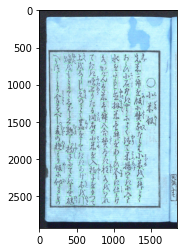

In [7]:
boxes = create_bboxes(sample['labels'])
draw_bboxes(image_path, boxes)

In [8]:
def save_resized_image(image_path: str, dim: Tuple[float, float]):
    
    im = cv2.imread(image_path)
    im = cv2.resize(im, dim, interpolation=cv2.INTER_CUBIC)
    cv2.imwrite('resized.png',im)

def resize_bboxes(bboxes: List[List[float]], image_path, new_dim):
    
    im = cv2.imread(image_path)
    original_dim = im.shape[:2]
    scale_x = new_dim[1] / original_dim[1]
    scale_y = new_dim[0] / original_dim[0]
    return [[int(round(x1*scale_x)), int(round(y1*scale_y)), int(round(x2*scale_x)), int(round(y2*scale_y))] for [x1,y1,x2,y2] in boxes]

In [9]:
boxes = resize_bboxes(boxes, image_path, (224,224))

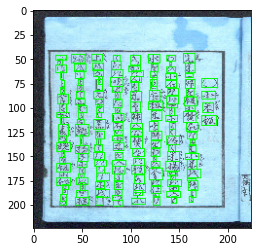

In [10]:
draw_bboxes('resized.png', boxes)

In [18]:
char = unicode_translation_df['Unicode'][0]
train_df[train_df['labels'].str.contains('U+3082', regex=False)]

,image_id,labels
0,100241706_00004_2,U+306F 1231 3465 133 53 U+304C 275 1652 84 69 ...
1,100241706_00005_1,U+306F 1087 2018 103 65 U+304B 1456 1832 40 73...
3,100241706_00006_1,U+3082 1455 3009 65 44 U+516B 1654 1528 141 75...
4,100241706_00007_2,U+309D 1201 2949 27 33 U+309D 1196 1539 27 36 ...
5,100241706_00008_1,U+25B2 1056 929 96 39 U+309D 379 1098 21 43 U+...
...,...,...
3600,umgy012-038,U+30FD 876 792 23 25 U+3078 256 2342 94 39 U+5...
3601,umgy012-039,U+309D 426 456 30 34 U+306F 584 359 82 45 U+30...
3602,umgy012-040,U+30DE 677 327 68 35 U+3078 1424 463 110 43 U+...
3603,umgy012-041,U+309D 1582 802 16 34 U+306F 597 2337 72 42 U+...
